#### CMSE 201 Final Project
### &#9989; Hailey Kuplerski
### &#9989; Section_004
#### &#9989; December 5, 2023

# ___Analyzing What Makes a Song "Danceable" and Its Relation To Its Frequency in Spotify Playlists___

### Research Question: What makes a song danceable, and does the danceability of a song affect its popularity? (According to Spotify)


## Background and Motivation

The average person listens to around 960 hours of music per year. Over their lifetime, the average person hears about 1.3 million songs (Ferjan). Me myself, I listened to around 54,000 minutes of music this year, or around 900 hours. My roommate listened to an outstanding 97,000 minutes of music this year, and to put that into perspective, that's around 4.5 hours per day. So, why are all of these facts significant to this study? It tells us music affects pretty much all of us on a daily basis, and it’s a pretty large effect too as a matter of fact, according to the facts above. However, this is no surprise since listening to music is proven to reduce pain, anxiety, and blood pressure, release dopamine, and improve sleep, alertness, and memory (Ferjan). To put it simply, music helps us feel good.

I came across a very interesting dataset on Kaggle titled "Most Streamed Spotify Songs 2023" that contained a lot of data about music. From this data, I found that Spotify keeps a diverse and large amount of data about their songs. This includes the duration of a song, the amount in Spotify playlists, and even key, mode, and __beats per minute (bpm)__. But Spotify also records more deeper insights of a song, such as __valence__ (a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track, where tracks with high valence sound more positive and cheerful, while tracks with low valence sound more negative, depressed, and angry), __speechiness__ (a measurement that detects the presence of spoken words in a track, where the more exclusively speech-like the recording like talk shows, audio books, and poetry, are closer to the value 1.0 and values closer to 0.0 most likely represent music and other non-speech-like tracks), and __energy__ (a measurement from 0.0 to 1.0 that represents a perceptual measure of intensity and activity, where loud and energetic songs are closer to 1.0 and softer songs are closer to 0.0) (“Get Track’s Audio Features.”). However, there was one element that caught my eye: __danceability__. According to Spotify, they can measure how suitable a track is for dancing by taking in factors based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity, where a value of 0.0 is the least danceable and 1.0 is the most danceable (“Get Track’s Audio Features.”). Taking this in, this led me to the questions, __how does danceability compare with other measurements, such as bpm, valence, speechiness, and energy? And does the danceability of a track affect its popularity?__



## Methodology

First things first, we need to read in our dataset (named spotify-2023.csv) and do some cleaning and sorting. My overall idea to measure a song’s popularity is to measure the amount of that song that is contained in Spotify playlists. This will give me an idea of how well-known a song is, or how many people like a particular song and then add it to their playlists. The dataset includes an odd number of songs and is an awkward length (952). In order to make what I am measuring more clear and concise, I aim to take the top 900 songs on Spotify that are in Spotify playlists. 

To do this, I sorted my dataset from most songs in Spotify playlists to least and reset the index. Then, took the top 900 songs using the .head() statement and set the original dataset equal to it, therefore resetting the original dataset to our new dataset.

In [1]:
# Import all extensions
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

#### Reading in the dataset spotify-2023.csv

In [2]:
# Read in the dataset, determine its encoding, and include the delimiter
sp23 = pd.read_csv("spotify-2023.csv", encoding='latin-1', delimiter=',')

sp23

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#### Sorting our dataset from in most Spotify playlists to in least Spotify playlists, then resetting the index values, then taking the top 900 songs

In [3]:
sp23.sort_values(by = 'in_spotify_playlists', ascending = False, inplace=True) # Sort values by in most spotify playlists to in least spotify playlists
sp23 = sp23.reset_index() # reset the index of the dataset
sp23 = sp23.head(900) # take the first 900 songs of the dataset and set it equal to the original dataset

sp23

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,...,116,F#,Minor,79,87,81,4,0,10,4
1,630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,...,148,C#,Major,35,24,93,0,0,10,8
2,720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,...,124,D,Major,53,66,78,0,0,16,5
3,624,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,...,117,C#,Major,52,73,91,0,0,11,7
4,199,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,...,84,F#,Minor,57,86,90,2,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,726,O.O,NMIXX,1,2022,2,22,290,0,135444283,...,200,B,Minor,39,28,77,4,0,6,29
896,376,Maan Meri Jaan,King,1,2022,10,12,288,6,319566866,...,96,F#,Minor,70,40,51,35,0,10,4
897,141,Novo Balanï¿½,"Veigh, Bvga Beatz, Supernova Ent, Prod Malax",4,2023,5,19,283,7,81102253,...,124,D#,Minor,84,65,50,67,0,13,6
898,355,ýýý98 Braves,Morgan Wallen,1,2023,3,3,282,0,56533272,...,142,D,Major,49,48,67,10,0,26,3


### Examining the relationships between danceability and bpm, speechiness, energy, and valence

Now that we have our cleaned up dataset, we can start comparing values to see how they relate with danceability in order to get a better idea of what danceability is. The values we want to compare to danceability are beats per minute (bpm), speechiness, energy, and valence, as well as amount in Spotify playlists at the end. First, I will assign variables to each measurement and their corresponding column in the dataset. Then, I will go on to plot these graphs with their according variables with scatter plots. By looking at the graphs, I can decide how I want to analyze the data.

#### Creating variables

In [4]:
dnc = sp23['danceability_%']        # danceability (percentage)
bpm = sp23['bpm']                   # beats per minute (bpm)
spc = sp23['speechiness_%']         # amount of speechiness (percentage)
eng = sp23['energy_%']              # amount of energy (percentage)
val = sp23['valence_%']             # amount of valence (percentage)
ply = sp23['in_spotify_playlists']  # amount in spotify playlists

#### Danceability vs bpm

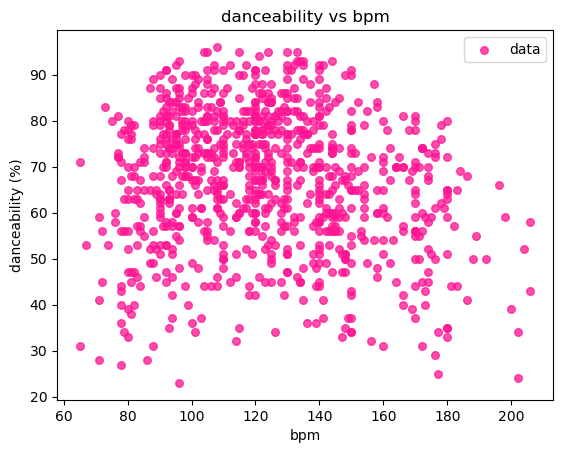

In [5]:
# create the plot
plt.scatter(bpm, dnc, color='deeppink', s=30, alpha=0.75, label='data')
plt.xlabel("bpm")
plt.ylabel("danceability (%)")
plt.title('danceability vs bpm')
plt.legend()

Looking at the graph, it seems to have an interesting shape, as it appears to rise and peak around some value of bpm, then falls. I thought it would be interesting to create a line of best fit using a quadratic equation to better evaluate the predicted bpm of a danceable song, and where the graph seems to peak.

Text(0.5, 1.0, 'danceability vs bpm')

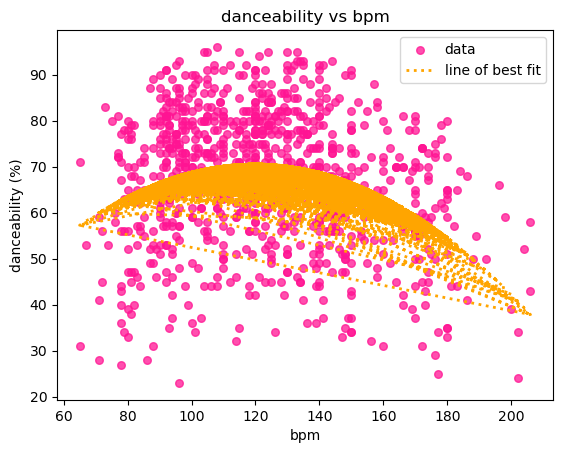

In [28]:
def quad(x,A,B,C):                # create the quadratic equation function
    y = (A*(x**2)) + (B*x) + C
    return(y)

quad_fit_parameters, just_ignore_this_for_now = curve_fit(quad, bpm, dnc) # use curve_fit to obtain the parameters

y_ex = quad(bpm, *quad_fit_parameters)    # create the expected y values for the line of best fit to be plotted

plt.scatter(bpm, dnc, s=30, color='deeppink', alpha=.75, label = "data")
plt.plot(bpm, y_ex, linewidth=2, color="orange", linestyle='dotted', label = "line of best fit") # plot line of best fit
plt.legend()
plt.xlabel("bpm")
plt.ylabel("danceability (%)")
plt.title('danceability vs bpm')

This line of best fit may look a bit confusing, as the x values (bpm) are not monotone, so the line plot is connecting points in the order they appear in x. However, we can still clearly see in the graph that the points peak around 120 bpm. We can take the mean and median of the data and plot them on the graph to further examine this peak, and to see where most of the data lies in relation to danceability.

mean: 122.85444444444444
median: 120.0


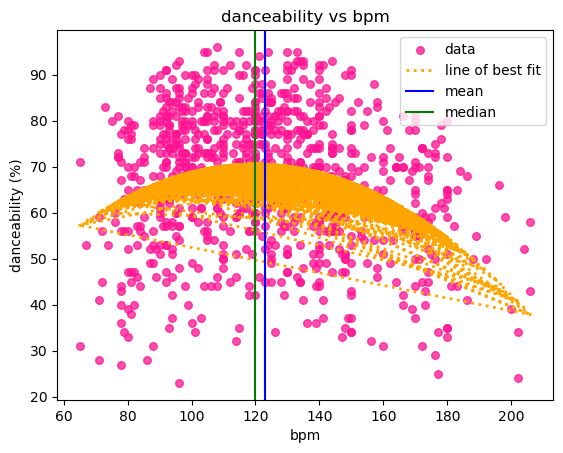

In [29]:
# ...same from previous code
def quad(x,A,B,C):
    y = (A*(x**2)) + (B*x) + C
    return(y)

quad_fit_parameters, just_ignore_this_for_now = curve_fit(quad, bpm, dnc)

y_ex = quad(bpm, *quad_fit_parameters)

plt.scatter(bpm, dnc, s=30, color='deeppink', alpha=.75, label = "data")
plt.plot(bpm, y_ex, linewidth=2, color="orange", linestyle='dotted', label = "line of best fit")
plt.legend()
plt.xlabel("bpm")
plt.ylabel("danceability (%)")
plt.title('danceability vs bpm')

plt.axvline(bpm.mean(), color='blue', label='mean')         # create a vertical line in the graph that represents the mean
plt.axvline(np.median(bpm), color='green', label='median')  # create a vertical line in the graph that represents the median
plt.legend()

print("mean:",bpm.mean())
print("median:",np.median(bpm))

From this graph, we can see that:
* the mean is around 122.854 bpm
* the median is 120 bpm
* line of best fit peaks around 120 bpm

#### Danceability vs speechiness

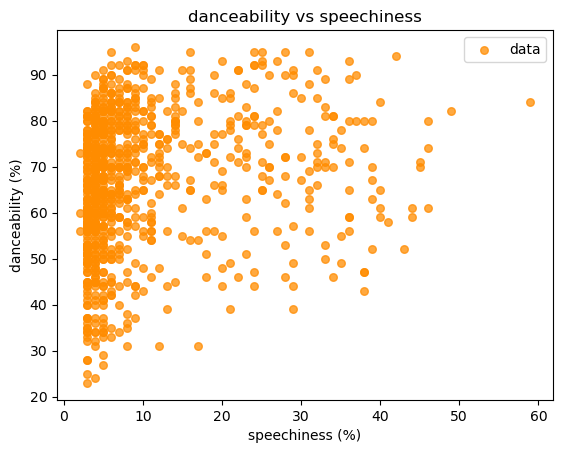

In [8]:
# create the plot
plt.scatter(spc, dnc, color='darkorange', s=30, alpha=0.75, label='data')
plt.xlabel("speechiness (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs speechiness')
plt.legend()

We can see in this graph that most of the data is more clumped in one area compared to the rest of the graph. This is where I believe taking the mean and the median of this data and plotting it on the graph would be best for examining the relationship displayed in this data.

mean: 10.272222222222222
median: 6.0


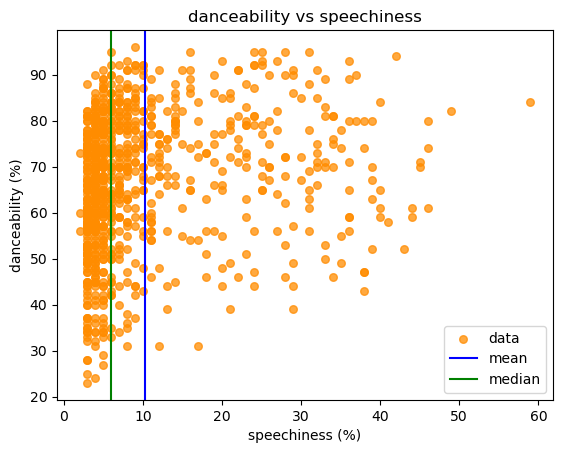

In [9]:
plt.scatter(spc, dnc, color='darkorange', s=30, alpha=0.75, label='data')
plt.xlabel("speechiness (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs speechiness')

plt.axvline(spc.mean(), color='blue', label='mean')          # create a vertical line in the graph that represents the mean
plt.axvline(np.median(spc), color='green', label='median')   # create a vertical line in the graph that represents the median
plt.legend()

print("mean:",spc.mean())
print("median:",np.median(spc))

From this graph, we can see that:
* the mean is around 10.272% speechiness
* the median is 6% speechiness
* most of the points clump around lower speechiness percentages

#### Danceability vs energy

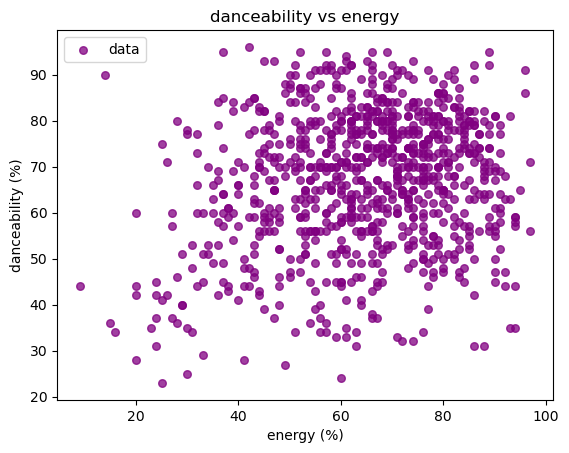

In [10]:
# create the plot
plt.scatter(eng, dnc, color='purple', s=30, alpha=0.75, label='data')
plt.xlabel("energy (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs energy')
plt.legend()

Looking at this graph, it looks as if it has some sort of positive linear slope as most of the points on the left side of the graph appear to be lower than most of the points on the right. This is where I believe creating a line of best fit using a linear equation would be best for examining the relationship displayed in this data, as well as calculating the Pearson correlation coefficient to see how significant the relationship is.

In [30]:
# take the pearson correlation coefficient of the danceability data in relation to the energy data
dnc.corr(eng, method='pearson') 

0.20002745716130413

The value of the slope is 0.17801072843722343
The value of the intercept is 55.52015795369449


Text(0.5, 1.0, 'danceability vs energy')

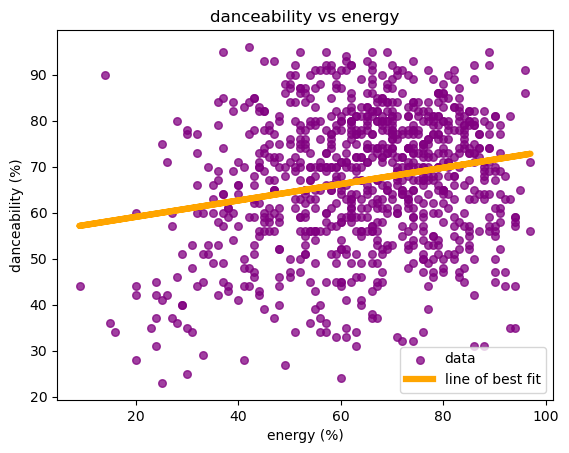

In [12]:
def lin(x, m, b):           # create the linear equation function
    y = (m * x) + b
    return y

best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, eng, dnc)  # use curve_fit to obtain the parameters
m_ex = best_fit_parameters[0]   # separate parameters
b_ex = best_fit_parameters[1]
print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])

y_ex = lin(eng, m_ex, b_ex) # create the expected y values for the line of best fit to be plotted

plt.scatter(eng, dnc, s=30, color='purple', alpha=.75, label = "data")
plt.plot(eng, y_ex, linewidth=4.5, color="orange", label = "line of best fit") # plot line of best fit
plt.legend()
plt.xlabel("energy (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs energy')

From this graph, we can see that:
* the Pearson correlation coefficient is 0.20002745716130413
* the slope of the line of best fit is around 0.178

#### Danceability vs valence

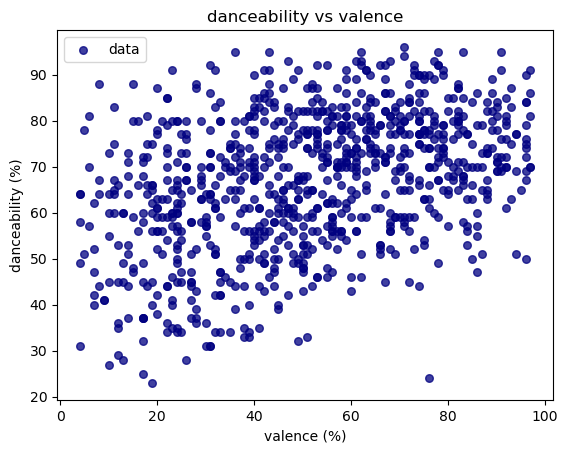

In [13]:
# create the plot
plt.scatter(val, dnc, color='navy', s=30, alpha=0.75, label='data')
plt.xlabel("valence (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs valence')
plt.legend()

Looking at this graph, it looks as if it has some sort of positive linear slope as most of the points on the left side of the graph appear to be lower than most of the points on the right. This is where I believe creating a line of best fit using a linear equation would be best for examining the relationship displayed in this data, as well as calculating the Pearson correlation coefficient to see how significant the relationship is, similar to the steps needed to examine the relationship we just looked at between danceability and energy.

In [14]:
# take the pearson correlation coefficient of the danceability data in relation to the valence data
dnc.corr(val, method='pearson')

0.4045079493449022

The value of the slope is 0.25374215871743544
The value of the intercept is 53.90882907003463


Text(0.5, 1.0, 'danceability vs valence')

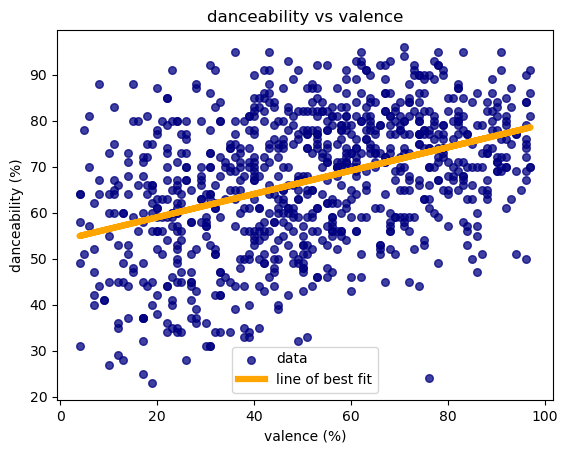

In [15]:
best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, val, dnc) # use curve_fit and previously established linear equation function to obtain parameters
m_ex = best_fit_parameters[0]   # separate parameters
b_ex = best_fit_parameters[1]
print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])

y_ex = lin(val, m_ex, b_ex) # create the expected y values for the line of best fit to be plotted

plt.scatter(val, dnc, color='navy', s=30, alpha=.75, label = "data")
plt.plot(val, y_ex, linewidth=4.5, color="orange", label = "line of best fit") # plot line of best fit
plt.legend()
plt.xlabel("valence (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs valence')

From this graph, we can see that:
* the Pearson correlation coefficient is 0.4045079493449022
* the slope of the line of best fit is around 0.254

### Examining the relationship between danceability and frequency in Spotify playlists.

Now that we have taken a look at how the danceability of a song relates to other measurements, therefore putting into perspective what the danceability of a song depends upon and how it is expressed numerically, we can now take a look at how danceability compares with popularity. For popularity, I will be using how much a song appears in Spotify playlists, or its frequency in Spotify playlists.

In order to examine this relationship, I will make a scatter plot of the data. I will then create a line of best fit for the data and calculate the Pearson correlation coefficient to analyze the significance of the relationship.

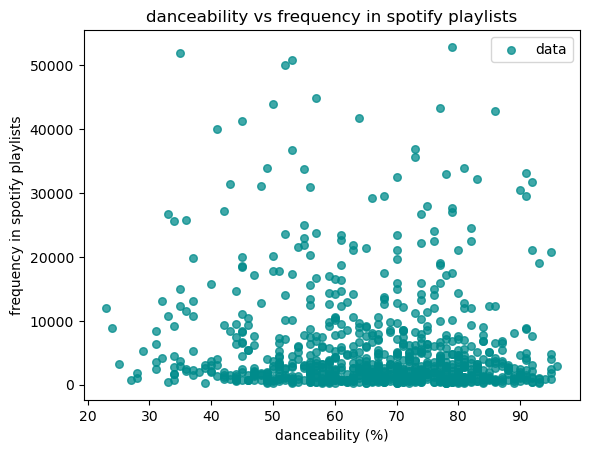

In [34]:
# create the plot
plt.scatter(dnc, ply, color='darkcyan', s=30, alpha=0.75, label='data')
plt.ylabel("frequency in spotify playlists")
plt.xlabel("danceability (%)")
plt.title('danceability vs frequency in spotify playlists')
plt.legend()

In [36]:
# take the pearson correlation coefficient of the amount in spotify playlists data in relation to the danceability data
ply.corr(dnc, method='pearson')

-0.11095295802111994

The value of the slope is -60.50397833140494
The value of the intercept is 9548.16759053415


Text(0.5, 1.0, 'danceability vs frequency in spotify playlists')

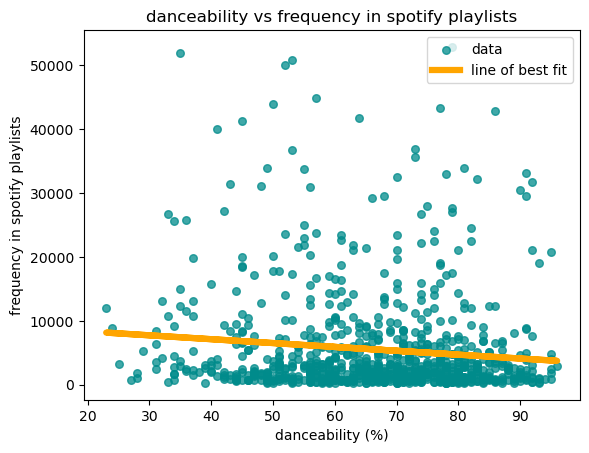

In [39]:
best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, dnc, ply) # use curve_fit and previously established linear equation function to obtain parameters
m_ex = best_fit_parameters[0]   # separate parameters
b_ex = best_fit_parameters[1]
print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])

y_ex = lin(dnc, m_ex, b_ex) # create the expected y values for the line of best fit to be plotted

plt.scatter(dnc, ply, color='darkcyan', s=30, alpha=.75, label = "data")
plt.plot(dnc, y_ex, linewidth=4.5, color="orange", label = "line of best fit")  # plot line of best fit
plt.legend()
plt.xlabel("danceability (%)")
plt.ylabel("frequency in spotify playlists")
plt.title('danceability vs frequency in spotify playlists')

From the graph, we can see that:
* the Pearson correlation coefficient is -0.11095295802111994 
* the slope of the line of best fit is around -60.504

## Results

#### Danceability vs bpm

mean: 122.85444444444444
median: 120.0


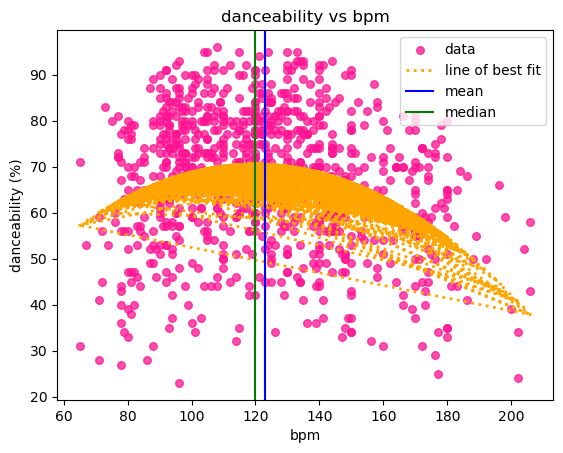

In [41]:
# ...previously used code
def quad(x,A,B,C):
    y = (A*(x**2)) + (B*x) + C
    return(y)

quad_fit_parameters, just_ignore_this_for_now = curve_fit(quad, bpm, dnc)

y_ex = quad(bpm, *quad_fit_parameters)

plt.scatter(bpm, dnc, s=30, color='deeppink', alpha=.75, label = "data")
plt.plot(bpm, y_ex, linewidth=2, color="orange", linestyle='dotted', label = "line of best fit")
plt.legend()
plt.xlabel("bpm")
plt.ylabel("danceability (%)")
plt.title('danceability vs bpm')

plt.axvline(bpm.mean(), color='blue', label='mean')
plt.axvline(np.median(bpm), color='green', label='median')
plt.legend()

print("mean:",bpm.mean())
print("median:",np.median(bpm))

Looking at the graph, it seems to have an interesting shape, as it appears to rise and peak around some value of bpm, then falls. The line of best fit may look a bit confusing, as the x values (bpm) are not monotone, so the line plot is connecting points in the order they appear in x. However, we can still clearly see in the graph that the points peak around 120 bpm. We can also see that the mean is around 122.854 bpm, and the median is 120 bpm. That being said, the graph indicates that songs with higher danceabilities seem to have a bpm of around 120, or typically range from 100 to 140.

#### Danceability vs speechiness

mean: 10.272222222222222
median: 6.0


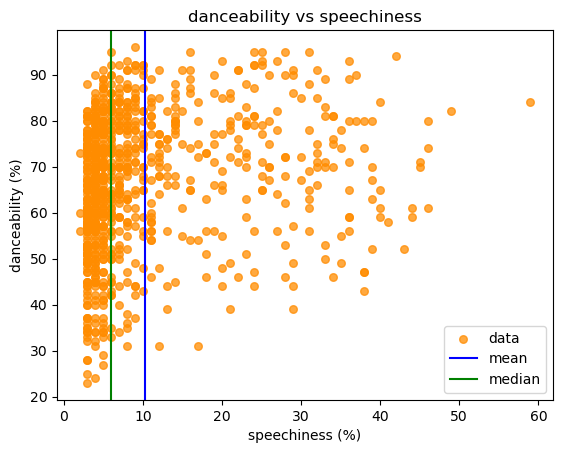

In [42]:
# ...previously used code
plt.scatter(spc, dnc, color='darkorange', s=30, alpha=0.75, label='data')
plt.xlabel("speechiness (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs speechiness')

plt.axvline(spc.mean(), color='blue', label='mean')
plt.axvline(np.median(spc), color='green', label='median')
plt.legend()

print("mean:",spc.mean())
print("median:",np.median(spc))

We can see in this graph that most of the data is more clumped in one area compared to the rest of the graph. We can also see that the mean is around 10.272% speechiness, and the median is 6% speechiness. This means that most danceable songs have a low percentage of speechiness, which makes sense when the definition of speechiness is a measurement that detects the presence of spoken words in a track, where the more exclusively speech-like the recording like talk shows, audio books, and poetry, are closer to the value 1.0 and values closer to 0.0 most likely represent music and other non-speech-like tracks. This means that more danceable songs are more musical and less speechy.

#### Danceability vs energy

The value of the slope is 0.17801072843722343
The value of the intercept is 55.52015795369449
The Pearson correlation coefficient is 0.20002745716130413


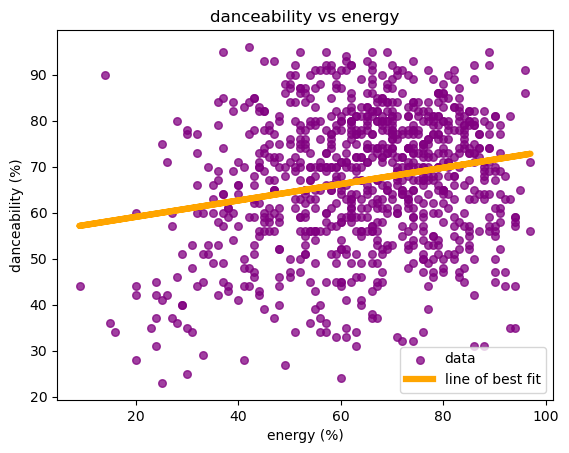

In [43]:
# ...previously used code
def lin(x, m, b):
    y = (m * x) + b
    return y

best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, eng, dnc)
m_ex = best_fit_parameters[0]
b_ex = best_fit_parameters[1]

y_ex = lin(eng, m_ex, b_ex)

plt.scatter(eng, dnc, s=30, color='purple', alpha=.75, label = "data")
plt.plot(eng, y_ex, linewidth=4.5, color="orange", label = "line of best fit")
plt.legend()
plt.xlabel("energy (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs energy')

print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])
print('The Pearson correlation coefficient is', dnc.corr(eng, method='pearson'))

From this graph, we can see that the data has a positive linear slope. We can also see that the Pearson correlation coefficient is 0.20002745716130413 and the slope of the line of best fit is around 0.178. The data indicates that as the percent energy increases, the percent danceability also increases. This makes sense because people typically dance to music that has high energy levels, and the definition of energy is a measurement from 0.0 to 1.0 that represents a perceptual measure of intensity and activity, where loud and energetic songs are closer to 1.0 and softer songs are closer to 0.0. However, it is important to note that the Pearson correlation coefficient indicates that the correlation is on the moderate-weak side, meaning that the relationship has a moderate-weak significance.

#### Danceability vs valence

The value of the slope is 0.25374215871743544
The value of the intercept is 53.90882907003463
The Pearson correlation coefficient is 0.4045079493449022


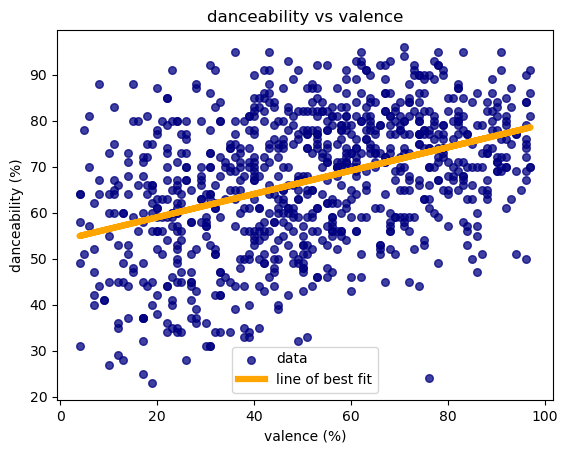

In [44]:
# ...previously used code
best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, val, dnc)
m_ex = best_fit_parameters[0]
b_ex = best_fit_parameters[1]

y_ex = lin(val, m_ex, b_ex)

plt.scatter(val, dnc, color='navy', s=30, alpha=.75, label = "data")
plt.plot(val, y_ex, linewidth=4.5, color="orange", label = "line of best fit")
plt.legend()
plt.xlabel("valence (%)")
plt.ylabel("danceability (%)")
plt.title('danceability vs valence')

print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])
print('The Pearson correlation coefficient is', dnc.corr(val, method='pearson'))

From this graph, we can see that the data has a positive linear slope. We can also see that the Pearson correlation coefficient is 0.4045079493449022 and the slope of the line of best fit is around 0.254. The data indicates that as the percent valence increases, the percent danceability also increases. This makes sense because people typically dance to music that is happy and lively and not sad and gloomy, and the definition of valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track, where tracks with high valence sound more positive and cheerful, while tracks with low valence sound more negative, depressed, and angry. The Pearson correlation coefficient indicates a moderate correlation, meaning that the relationship holds significance.

#### Danceability vs frequency in Spotify playlists

The value of the slope is -60.50397833140494
The value of the intercept is 9548.16759053415
The Pearson correlation coefficient is -0.11095295802111994


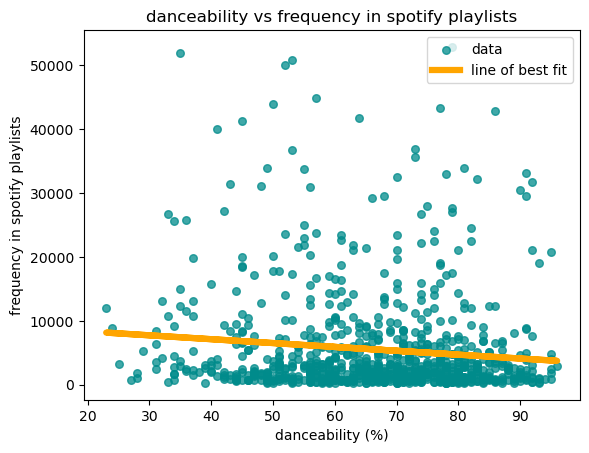

In [45]:
# ...previously used code
best_fit_parameters, just_ignore_this_for_now = curve_fit(lin, dnc, ply)
m_ex = best_fit_parameters[0]
b_ex = best_fit_parameters[1]

y_ex = lin(dnc, m_ex, b_ex)

plt.scatter(dnc, ply, color='darkcyan', s=30, alpha=.75, label = "data")
plt.plot(dnc, y_ex, linewidth=4.5, color="orange", label = "line of best fit")
plt.legend()
plt.xlabel("danceability (%)")
plt.ylabel("frequency in spotify playlists")
plt.title('danceability vs frequency in spotify playlists')

print('The value of the slope is', best_fit_parameters[0])
print('The value of the intercept is', best_fit_parameters[1])
print('The Pearson correlation coefficient is', ply.corr(dnc, method='pearson'))

From the graph, we can see that the Pearson correlation coefficient is -0.11095295802111994 and the slope of the line of best fit is around -60.504. The data also appears to be clumped on one side of the graph, or the side that has a low frequency in Spotify playlists. The data also appears to be scattered, and the fact that the correlation coefficient is a small number reflects that the correlation is weak and the relationship has little significance. One could say that the line of best fit has a negative slope and it appears as if danceability increases, the frequency in spotify playlists decreases. However, the correlation is very weak, indicating little to no relationship.

## Discussion and Conclusion

In the end, we can conclude that:
* The most danceable songs peak at around 120 bpm, or in a range between 100-140 bpm.
* The most danceable songs are less speechy and have a low speechiness percentage.
* As the energy of a song increases, the danceability of that song increases.
* As the valence of a song increases, the danceability of that song increases.
* The popularity of a song is not so dependant on its danceability.

When comparing danceability and beats per minute (bpm), higher danceability values seem to peak around 120 bpm. The songs with the highest danceability values appeared to generally fall between 100 and 140. So, why does danceability peak around these values? When people dance to music, they usually dance to a beat. This specific bpm range must contain a beat that is easy to dance to, that being said, not too fast and not too slow. This is why I believe danceability peaks around this bpm since it is near the middle of the graph created.

When comparing danceability and speechiness, we can see that the mean is around 10.272% speechiness, and the median is 6% speechiness. This means that most danceable songs have a low percentage of speechiness. This makes sense when the definition of speechiness is a measurement that detects the presence of spoken words in a track, where the more exclusively speech-like the recording like talk shows, audio books, and poetry, are closer to the value 1.0 and values closer to 0.0 most likely represent music and other non-speech-like tracks. This means that more danceable songs are more musical and less speechy. People usually dance to musical tracks, not speeches and podcasts. So, this information is nothing out of the ordinary and was exactly as I expected.

When comparing danceability and energy, we can see that the data has a positive linear slope. We can also see that the Pearson correlation coefficient is 0.20002745716130413 and the slope of the line of best fit is around 0.178. The data indicates that as the percent energy increases, the percent danceability also increases. This makes sense since people usually dance to high-energy music, and energy in this dataset is defined as a value ranging from 0.0 to 1.0 that indicates a perceptual measure of intensity and activity. Loud and energetic songs are closer to 1.0, while gentler songs are closer to 0.0. However, it is important to note that the Pearson correlation coefficient indicates that the correlation is on the moderate-weak side, meaning that the relationship has a moderate-weak significance. In my opinion, I would still consider danceability and energy to have a significant relationship.

When comparing danceability and valence, we can see that the data has a positive linear slope. We can also see that the Pearson correlation coefficient is 0.4045079493449022 and the slope of the line of best fit is around 0.254. The data indicates that as the percent valence increases, the percent danceability also increases. The definition of valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track, where tracks with high valence sound more positive and cheerful, while tracks with low valence sound more negative, depressed, and angry. Taking this in, the data gathered makes sense. People don't usually dance to negatve and sad music; they usually dance to happy and lively music, since people usually dance when they are in a good mood. It is also important to take account for the Pearson correlation coefficient, which indicates a moderate correlation, meaning that the relationship holds significance.

_Taking all of this in, we can conclude that a highly danceable song typically has a bpm of 100-140 bpm, a low speechiness percentage, a high energy percentage, and a high valence percentage._

Lastly, when comparing danceability and frequency in Spotify playlists, we can see that the data is very scattered when graphed. The Pearson correlation coefficient turned out to be -0.11095295802111994 and the slope of the line of best fit was around -60.504. One could argue that with this data, since the line of best fit has a negative slope, as if danceability increases, the frequency in spotify playlists decreases. However, since the correlation coefficient is a small number, it reflects the fact that the data is very scattered and the correlation is weak. Therfore, the relationship has little to no significance at all. That being said, there is little to no correlation between the danceability of a song and its frequency in spotify playlists, or its popularity.

_From this, we can conclude that danceability and popularity do not share much of a relationship._

So, why is this the case? I believe it is because the danceability of a song doesn't really deterimine its popularity. That being said, just because a song is easy to dance to doesn't make it more popular. Sure, some songs are popular because people like to dance to them and they are easy to dance to. But, for instance, less danceable songs can also be popular. People listen to and like a wide variety of different kinds of music. This means popularity can range all over the place; popular songs can sound calm, energetic, melancholic, angry, and all in between. It is important to take note that everyone has different tastes in music, some people might not like to listen to danceable music, or like danceable music less than others might. This is why I believe is the reason why danceability and popularity share not much of a relationship.

I did run into some obstacles with creating this project. One obstacle included how I wanted to organize my data. I was trying to pick from going from most popular to least popular (what I ended up doing in the project), or going from most danceable to least danceable. I decided to go with going from most popular to least popular, since this is what I wanted to base my findings on, and it also most likely includes a good combination of more danceable songs and less danceable songs. This would allow me to make better comparisons (how more danceable songs compare to less danceable songs) and predictions. I also wanted to include total amount of streams to analyze the relationship between the popularity of a song and its danceability, but the data contained an unusual string under the streams column, and it interfered with my calculations even when I attempted to drop the row with the unexpected string value. So I decided to go by number in Spotify playlists, which I think can also reflect popularity accurately, as I feel if someone likes a song, they would most likely add it to their playlists, making a song popular if a lot of people add it to their playlists.

For next time, I would try to figure out how to remove the bug (unexpected string) in my dataset, so that I can calculate values and graph the relationship between amount streams and danceability. I would also compare more columns of data to analyze how danceability affects the popularity of a song, including amount of streams and amount of songs in apple playlists. I would also compare more columns to danceability to examine more relationships, like key or mode.

### References

1. Elgiriyewithana, Nidula. “Most Streamed Spotify Songs 2023.” Kaggle, 26 Aug. 2023, www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data. 

2. “Get Track’s Audio Features.” Web API Reference | Spotify for Developers, Spotify, developer.spotify.com/documentation/web-api/reference/get-audio-features#. Accessed 6 Dec. 2023. 

3. Ferjan, Matija. “30+ People Listening to Music Statistics &amp; Trends (2023).” HeadphonesAddict, 8 Aug. 2023, headphonesaddict.com/listening-to-music-statistics/. 